<a href="https://colab.research.google.com/github/Maicken052/MACC/blob/main/Caso_de_Estudio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Caso de Estudio:***
## Aprendizaje automático de máquina - Universidad del Rosario
### Samuel Fernando De Dios Pérez <br> Robert Daniel Fonseca Lesmez <br> Escuela de Ingeniería, Ciencia y Tecnología

## **Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entrenar los datos
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, roc_auc_score #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from tensorflow import keras
from keras import layers, models

import plotly.express as px

## **Importar el dataset**

In [ ]:
data_ori=pd.read_csv('/content/drive/MyDrive/Uni/maquinas 2024-1/nasa.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

Como no hay datos nulos, dejamos las filas como están

Se procede a eliminar las filas innecesarias para el modelo (fechas, datos no numéricos, ID's, y filas con mucha correlación)

In [ ]:
data = data.drop(["Hazardous",
                "Neo Reference ID",
                  "Name",
                  "Equinox",
                  "Orbiting Body",
                  "Est Dia in KM(min)",
                  "Est Dia in KM(max)",
                  "Est Dia in M(min)",
                  "Est Dia in M(max)",
                  "Est Dia in Feet(min)",
                  "Est Dia in Feet(max)",
                  "Close Approach Date",
                  "Relative Velocity km per sec",
                  "Miss Dist.(Astronomical)",
                  "Miss Dist.(lunar)",
                  "Miss Dist.(kilometers)",
                  "Orbit ID",
                  "Orbit Determination Date",
                  "Est Dia in Miles(min)",
                  "Relative Velocity km per hr",
                  "Jupiter Tisserand Invariant",
                  "Perihelion Time",
                  "Aphelion Dist",
                  "Semi Major Axis",
                  "Orbit Uncertainity",
                  "Eccentricity",
                  "Miles per hour",
                  "Orbital Period",
                  "Absolute Magnitude",
                  "Perihelion Distance"],
                axis=1)

In [ ]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
data.head() #Visualización del dataset

Número de filas: 4687, Número de columnas: 40


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Tenemos una baja cantidad de filas, así que podemos sospechar que habrán problemas a la hora de entrenar el modelo (sesgos en la cantidad de positivos o negativos)

In [ ]:
ocurrencias = data['Hazardous'].value_counts()
print(ocurrencias)

False    3932
True      755
Name: Hazardous, dtype: int64


Acá confirmamos que puede existir un sesgo con los verdaderos, ya que son muy pocos en comparación con los falsos.

In [ ]:
print(data.nunique()) #Diferentes tipos de valores por columna

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date         457
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [ ]:
#Tipos de datos
categorical_data = data.select_dtypes(include=object)
print(categorical_data.columns)
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.columns)

Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')
Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')


Con los cambios realizados anteriormente, podemos observar que todas las variables terminan siendo numéricas, por lo que sirven para entrenar el modelo.

## **Insights**

Text(0.5, 1.0, 'Correlation Heatmap')

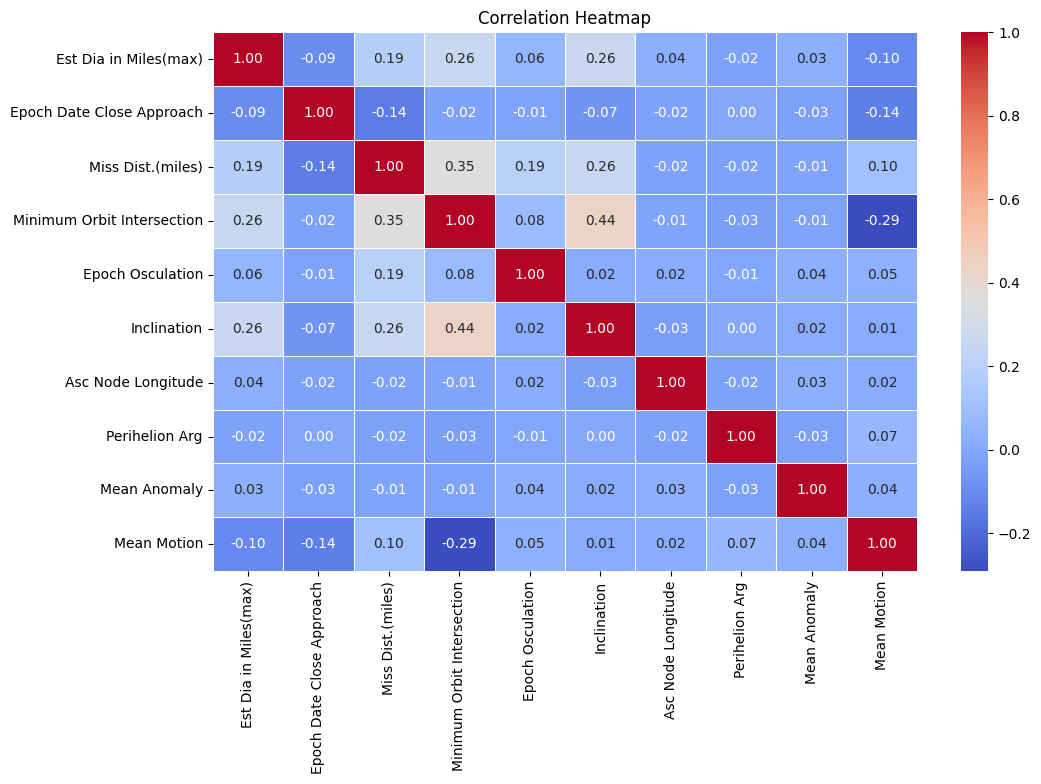

In [ ]:
#Visualización de la matriz de correlación
correlation_matrix = data.corr()
cov_matrix = data.cov()
plt.figure(figsize=(25, 7))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

Podemos ver que las columnas restantes poseen baja correlación, por lo que no eliminaremos más de ellas.

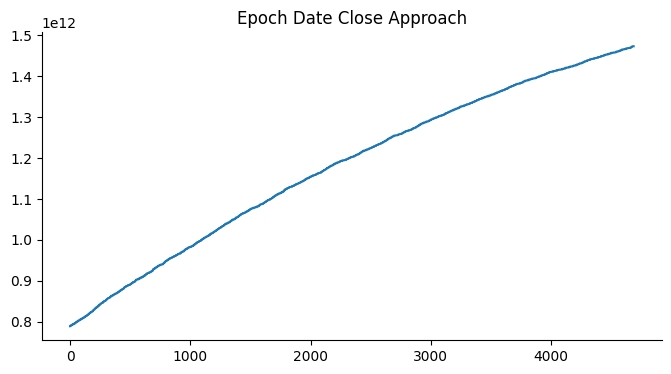

In [ ]:
# @title Epoch Date Close Approach

from matplotlib import pyplot as plt
data['Epoch Date Close Approach'].plot(kind='line', figsize=(8, 4), title='Epoch Date Close Approach')
plt.gca().spines[['top', 'right']].set_visible(False)

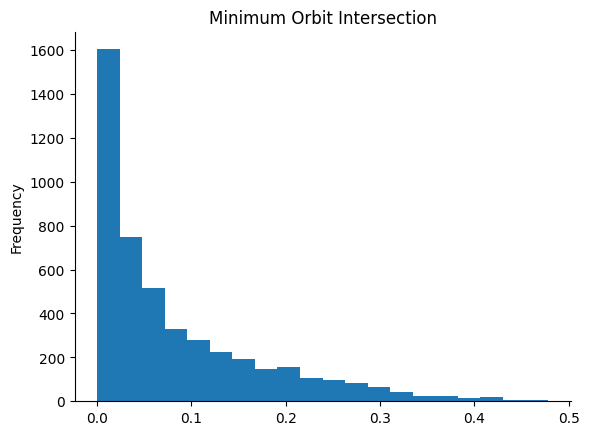

In [ ]:
# @title Minimum Orbit Intersection

from matplotlib import pyplot as plt
data['Minimum Orbit Intersection'].plot(kind='hist', bins=20, title='Minimum Orbit Intersection')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Modelos de clasificación**

Previo al uso de cualquier modelo, dividimos los datos en train y test con su debida estandarización, además, quitamos la adiposidad dado que está muy relacionada con la obesidad, y lo mejor es no repetir información para no sesgar el modelo.

In [ ]:
X = data.drop(["Hazardous",
                "Neo Reference ID",
                  "Name",
                  "Equinox",
                  "Orbiting Body",
                  "Est Dia in KM(min)",
                  "Est Dia in KM(max)",
                  "Est Dia in M(min)",
                  "Est Dia in M(max)",
                  "Est Dia in Feet(min)",
                  "Est Dia in Feet(max)",
                  "Close Approach Date",
                  "Relative Velocity km per sec",
                  "Miss Dist.(Astronomical)",
                  "Miss Dist.(lunar)",
                  "Miss Dist.(kilometers)",
                  "Orbit ID",
                  "Orbit Determination Date",
                  "Est Dia in Miles(min)",
                  "Relative Velocity km per hr",
                  "Jupiter Tisserand Invariant",
                  "Perihelion Time",
                  "Aphelion Dist",
                  "Semi Major Axis",
                  "Orbit Uncertainity",
                  "Eccentricity",
                  "Miles per hour",
                  "Orbital Period",
                  "Absolute Magnitude",
                  "Perihelion Distance"],
                axis=1)
y = data['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)

(3280, 10) (1407, 10)


###**KNN**

Previo a la creación del modelo final, veamos cuál es el mejor número de vecinos usando vecinos con peso. El peso a asignar será la distancia que tenga con cada vecino (si es menos distancia, menos peso, y si es más distancia, más peso)

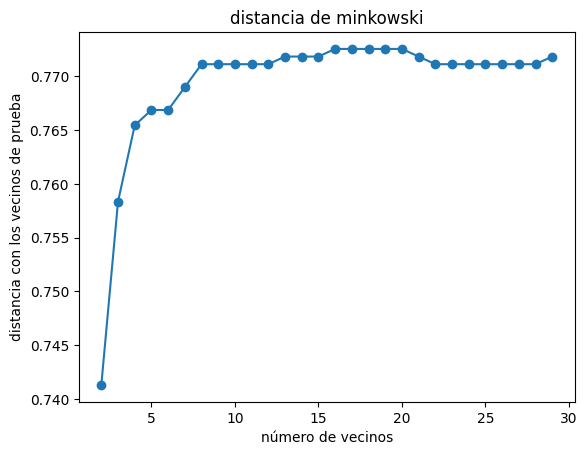

In [ ]:
dist = []

for i in range(2, 30):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,30), dist, marker='o')
plt.title('distancia de minkowski')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

Vemos que uno de los intervalos con mejor número de vecinos está entre 16 y 19, así que usamos uno de estos, en este caso, 17, para evitar el uso de vecinos impares. Se usan distintas métricas de distancia con el fin de saber cuál nos da mejores resultados, pero en general podemos obtener la misma exactitud máxima con cualquiera, por lo que dejamos la default, es decir, minkowski.

**Creación del modelo**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17, weights='distance')
knn.fit(X_train_sc, y_train)
y_pred_knn = knn.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_knn}\n')
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred_knn)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_knn)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

los diagnosticos predecidos son:
 [False False False ... False False False]

La precisión del modelo es: 0.8500355366027008

La matriz de confusión es:
 [[1147    8]
 [ 203   49]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.99      0.92      1155
        True       0.86      0.19      0.32       252

    accuracy                           0.85      1407
   macro avg       0.85      0.59      0.62      1407
weighted avg       0.85      0.85      0.81      1407



###**Naive Bayes**

**Creación del modelo**

In [ ]:
naive = GaussianNB()
naive.fit(X_train_sc, y_train)
y_pred_naive = naive.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_naive}\n')
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred_naive)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_naive)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_naive))

los diagnosticos predecidos son:
 [ True False False ... False False False]

La precisión del modelo es: 0.8130774697938877

La matriz de confusión es:
 [[975 180]
 [ 83 169]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.84      0.88      1155
        True       0.48      0.67      0.56       252

    accuracy                           0.81      1407
   macro avg       0.70      0.76      0.72      1407
weighted avg       0.84      0.81      0.82      1407



###**Red**

**Creación del modelo**

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(12, activation='relu', input_shape=X_train_sc.shape[1:]),
                                 keras.layers.Dense(24, activation='sigmoid'),
                                 keras.layers.Dense(12, activation='sigmoid'),
                                 keras.layers.Dense(7, activation='sigmoid'),
                                 keras.layers.Dense(5, activation='sigmoid'),
                                 keras.layers.Dense(1, activation='sigmoid')
                                 ])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.00001)
model.compile(optimizer=optimizer,loss='BinaryCrossentropy',metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
historial=model.fit(X_train_sc, y_train, epochs=150)

Epoch 1/150
103/103 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.1534 - recall: 1.0000 - precision: 0.1534
Epoch 2/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4851 - recall: 0.4811 - precision: 0.1449
Epoch 3/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.8466 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.8466 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.8466 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/150
103/103 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.8466 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/150
103/103 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.8466 - recall: 0.0000e+00 - precision: 0.000

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.8209 - recall: 0.0000e+00 - precision: 0.0000e+00


[0.49396997690200806, 0.8208954930305481, 0.0, 0.0]

In [ ]:
y_pred=model.predict(X_test_sc)

y_pred_u = [y_pred[i][0] for i in range(len(y_pred))]

y_pred_bi = [1 if y_pred_u[i]>=0.5 else 0 for i in range(len(y_pred_u))]


In [ ]:
model.summary()

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_naive}\n')
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred_naive)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_naive)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_naive))

###**Graficas de verificación y comparación de los resultados y el modelo**

**Matriz de confusión**



*   Verdadero Positivo (TP): Los casos que el modelo ha clasificado correctamente como positivos.
*   Falso Negativo (FN): Los casos positivos que el modelo ha clasificado incorrectamente como negativos.
*   Falso Positivo (FP): Los casos negativos que el modelo ha clasificado incorrectamente como positivos.
*   Verdadero Negativo (TN): Los casos que el modelo ha clasificado correctamente como negativos.

Se desea que los TP y TN sean los más altos.

In [ ]:
plt.figure(figsize=(12, 4))


#segunda grafica
plt.subplot(1, 3, 1)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión KNN')


#tercera grafica
plt.subplot(1, 3, 2)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_naive)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Naive-Bayes')

plt.subplot(1, 3, 3)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_bi)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Red')



plt.show()

**Curva ROC**

La curva ROC representa la tasa de verdaderos positivos en el eje y y la tasa de falsos positivos en el eje x para diferentes umbrales de clasificación.

Nos dice que tan bueno es el modelo para distinguir entre dos clases.

* Sensibilidad (recall): Proporción de identificados correctamente con 1. $$sensibilidad=\frac{TP}{TP+FN}$$
* Especificidad: Proporción de identificados correctamente con 0. $$especificidad=\frac{TN}{TN+FP}$$

La curva ROC es la gráfica que relaciona 1-especificidad y la sensibilidad.

$AUC$ es el área bajo la curva ROC y nos dice el porcentaje para distinguir entre clases. Nunca se debe de aproximar a $0.5$.

In [ ]:
plt.figure(figsize=(15, 4))


#segunda grafica
plt.subplot(1, 2, 1)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = knn.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC del KNN')
plt.grid(True)
plt.legend(loc="lower right")


#tercera grafica
plt.subplot(1, 2, 2)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = naive.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC de Naive-Bayes')
plt.grid(True)
plt.legend(loc="lower right")




plt.show()

**$F_{\beta}$ score**

$$F_\beta = (1 + \beta^{2}) \cdot \frac{precision \times recall}{\left(\beta^{2} \cdot precision\right) + recall}$$

$\beta$ es un parámetro que controla la relación de la precisión con el recall.

Un valor de $\beta>1$ da más peso a la precisión, si $F_{\beta} \xrightarrow{\beta\rightarrow\infty}precision$.

Un valor de $\beta<1$ da más peso al recall.

Un valor de $\beta = 1$ da el mismo peso.

In [ ]:
# Valores de beta
betas = np.linspace(0, 2, 20)


plt.figure(figsize=(15, 5))

#segunda grafica
plt.subplot(1, 2, 1)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_knn)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score del KNN')
plt.grid(True)


#tercera grafica
plt.subplot(1, 2, 2)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_naive)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score de Naive-Bayes')
plt.grid(True)

plt.show()

cambio de algoritmo en knn no hace cambios

a todos los modelos les cuesta detectar el 1, puesto que la base tiene muchos mas 0 que 1

Finalmente, vemos que las mejores métricas para analizar este problema son la precisión y el recall, dado que nos dejan ver que el modelo tiene problemas para clasificar los casos positivos, cualesquiera que sea el modelo usado. El mejor modelo en este caso, que es el árbol, sigue teniendo problemas con la detección de casos positivos porque su recall es de 0.44 y su precisión de 0.65. Esto se relaciona con el AUC-ROC, puesto que esto nos dice la capacidad del modelo de diferenciar las clases, dando un área de 0.69.

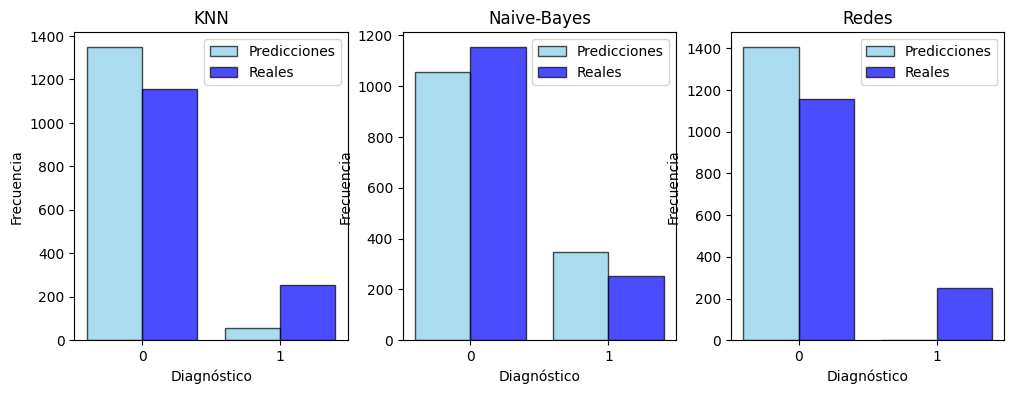

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist([y_pred_knn, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('KNN')
plt.legend()
plt.xticks([0, 1])

plt.subplot(1, 3, 2)
plt.hist([y_pred_naive, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Naive-Bayes')
plt.legend()
plt.xticks([0, 1])

plt.subplot(1, 3, 3)
plt.hist([y_pred_bi, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Redes')
plt.legend()
plt.xticks([0, 1])
plt.show()